# Physics 512 - Optics Lab

## Tucker Knaak - Department of Physics, Creighton University - Spring 2022

### Geometrical Optics Lab

#### This experiment will give you the opportunity to review what you have learned about thin lenses and further develop your experimental and analysis skills. Specifically, you will use and compare several techniques for measuring the focal lengths of positive and negative lenses by observing real and virtual images formed from a real object. It is expected that you will use the nonlinear least squares fitting routine that you are writing to complete the curve fitting and statistical analysis of the fit.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData

#### Measured data of eight object / image pairs attempting to find the focal length of the lens.  The object / image vergence as well as focal length and power are calculated from these object / image pairs.

In [2]:
'''Recorded data from lab'''
do_list = [0.482, 0.32, 0.725, 0.37, 0.09, 0.11, -0.26, -0.4]        #object distance [m]
di_list = [0.181, 0.228, 0.17, 0.208, -0.705, -0.287, 0.092, 0.104]  #image distance [m]

'''Calculated data from object and image distances'''
verg_obj_list = [1 / do for do in do_list]  #object vergence [1 / m]
verg_img_list = [1 / di for di in di_list]  #image vergence [1 / m]
f_list = [(do * di) / (do + di) for do, di in zip(do_list, di_list)]            #focal length [m]
power_list = [v_do + v_di for v_do, v_di in zip(verg_obj_list, verg_img_list)]  #power [1 / m]

'''Reported and calculated error in data'''
do_err = [0.001 for i in range(len(do_list))]  #object distance
di_err = [0.001 for i in range(len(di_list))]  #image distance
verg_obj_err = [do_err / (do**2) for do, do_err in zip(do_list, do_err)]  #object vergence
verg_img_err = [di_err / (di**2) for di, di_err in zip(di_list, di_err)]  #image vergence

#### The thin-lens equation is used as a non-linear fit to find the best-fit focal length from the measured data.

The best-fit focal length is f = 0.133 ± 0.001m.


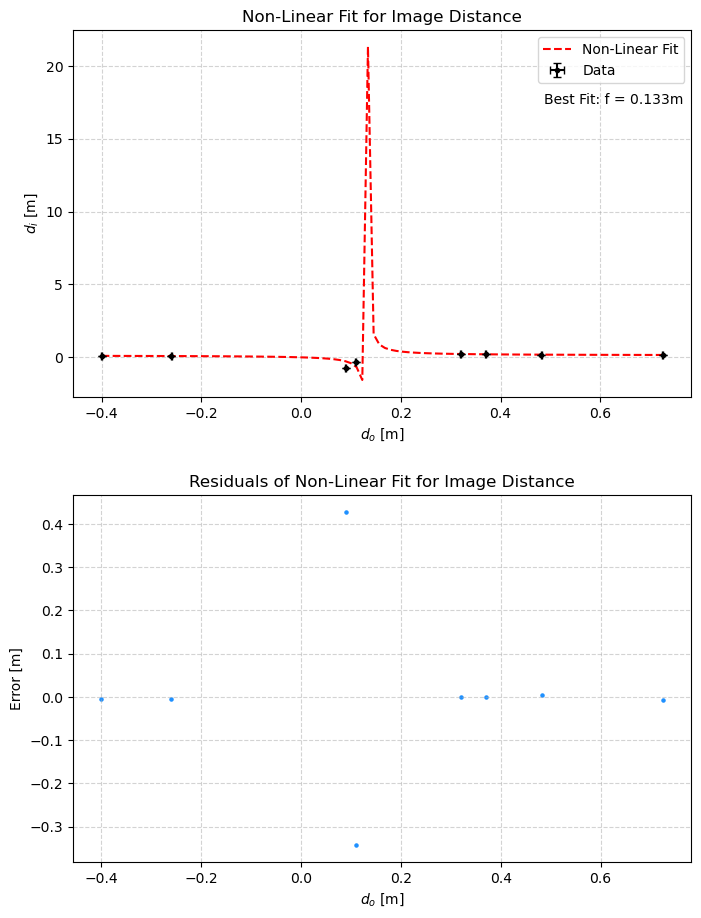

In [3]:
'''Function to calculate image distance'''
def image_distance(params: list, do: float):
    f = params[0]  #best-fit focal length
    return (f * do) / (do - f)

'''Non-linear scipy.odr curvefit'''
data = RealData(do_list, di_list, do_err, di_err)
model = Model(image_distance)
pguess = [0.13]
odr = ODR(data, model, pguess)
output = odr.run()
f, f_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(do_list))
residuals = [image_distance(output.beta, do) - di for do, di in zip(do_list, di_list)]
print(f'The best-fit focal length is f = {f:.3f} \u00B1 {f_err:.3f}m.')

'''Plot results'''
do_points = np.linspace(min(do_list), max(do_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Non-linear fit'''
ax1.set_xlabel('$d_o$ [m]')
ax1.set_ylabel('$d_i$ [m]')
ax1.set_title('Non-Linear Fit for Image Distance')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(do_points, image_distance(output.beta, do_points), linestyle = 'dashed', color = 'red', label = 'Non-Linear Fit')
ax1.errorbar(do_list, di_list, di_err, do_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper right')
ax1.annotate(f'Best Fit: f = {f:.3f}m', xy = (0.875, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$d_o$ [m]')
ax2.set_ylabel('Error [m]')
ax2.set_title('Residuals of Non-Linear Fit for Image Distance')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(do_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/FocalLength_NonLinearFit.png')

#### The thin-lens vergence equation is used as a linear fit to find the best-fit power, where $P=1/f$, from the measured data.

The best-fit power is P = 7.458 ± 0.051D.


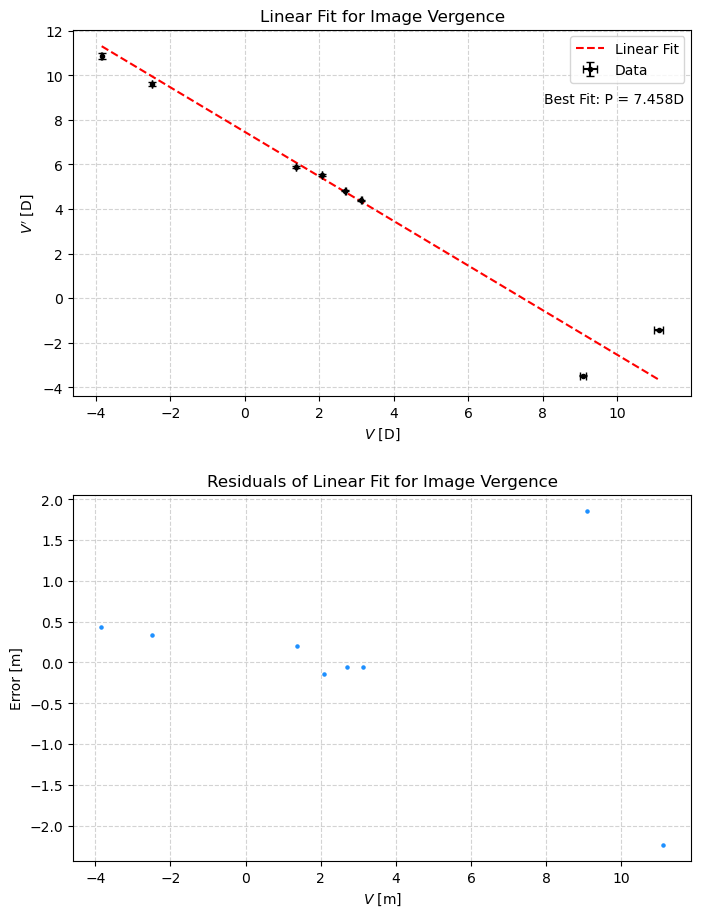

In [4]:
'''Function to calculate image vergence'''
def image_vergence(params: list, verg_obj: float):
    P = params[0]  #best-fit power
    return (P - verg_obj)

'''Linear scipy.odr curvefit'''
data = RealData(verg_obj_list, verg_img_list, verg_obj_err, verg_img_err)
model = Model(image_vergence)
pguess = [7.5]
odr = ODR(data, model, pguess)
output = odr.run()
P, P_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(verg_obj_list))
residuals = [image_vergence(output.beta, verg_obj) - verg_img for verg_obj, verg_img in zip(verg_obj_list, verg_img_list)]
print(f'The best-fit power is P = {P:.3f} \u00B1 {P_err:.3f}D.')

'''Plot results'''
verg_obj_points = np.linspace(min(verg_obj_list), max(verg_obj_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Linear fit'''
ax1.set_xlabel('$V$ [D]')
ax1.set_ylabel('$V^{\prime}$ [D]')
ax1.set_title('Linear Fit for Image Vergence')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(verg_obj_points, image_vergence(output.beta, verg_obj_points), linestyle = 'dashed',
         color = 'red', label = 'Linear Fit')
ax1.errorbar(verg_obj_list, verg_img_list, verg_img_err, verg_obj_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper right')
ax1.annotate(f'Best Fit: P = {P:.3f}D', xy = (0.875, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$V$ [m]')
ax2.set_ylabel('Error [m]')
ax2.set_title('Residuals of Linear Fit for Image Vergence')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(verg_obj_list, residuals, c = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Power_LinearFit.png')